In [3]:
import pandas as pd

from loader import FileLoader

loader = FileLoader('../dataset/')
df = pd.DataFrame(loader.aggregate())

In [4]:
occlusion_type = ['not_occluded', 'bottom_mislabled', 'top_mislabled', 'bottom_occluded', 'top_occluded', 'fully_occluded']

In [5]:
num_occlusion = df.groupby(df.columns.to_list()[1:4])['name']\
                .count().to_frame()['name'].values

In [6]:
occlusion_summary = pd.DataFrame(num_occlusion, index=occlusion_type, columns=['counts'])
occlusion_summary.values

array([[6668],
       [   1],
       [   1],
       [6908],
       [1582],
       [ 141]])

In [7]:
mislabled = occlusion_summary.loc['top_mislabled'] + occlusion_summary.loc['bottom_mislabled']
occlusion_summary.loc["mislabled"] = mislabled

In [8]:
occlusion_summary.drop(['bottom_mislabled', 'top_mislabled'], inplace=True)

In [9]:
occlusion_summary

,counts
not_occluded,6668
bottom_occluded,6908
top_occluded,1582
fully_occluded,141
mislabled,2


In [10]:
explode = [0.05, 0.05, 0.05, 0.05, 0.5]


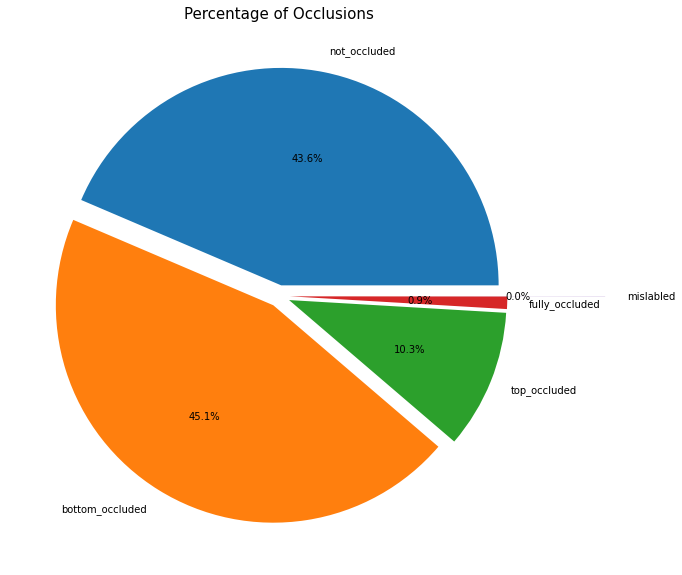

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.title("Percentage of Occlusions", fontsize=15)
plt.pie(
    occlusion_summary.values.squeeze(),
    labels=occlusion_summary.index,
    explode=explode,
    autopct='%1.1f%%',
)
plt.show()